<a href="https://colab.research.google.com/github/cbfelp/Projeto-redes-neurais-convolucionais/blob/main/Ponto_de_partida_Unidade_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 95% 107M/113M [00:00<00:00, 204MB/s] 
100% 113M/113M [00:00<00:00, 181MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m-014-01.jpg', 'm-074-01.jpg', 'm1-024-01.jpg', 'f1-002-01.jpg', 'f-014-01.jpg', 'm-026-01.jpg', 'm1-033-01.jpg', 'm-054-01.jpg', 'm1-009-01.jpg', 'f-012-01.jpg', 'm-084-01.jpg', 'f-032-01.jpg', 'm-059-01.jpg', 'm-067-01.jpg', 'f-042-01.jpg', 'm-039-01.jpg', 'f-043-01.jpg', 'm-061-01.jpg', 'm1-038-01.jpg', 'm-013-01.jpg', 'f-022-01.jpg', 'm1-020-01.jpg', 'f1-009-01.jpg', 'm-047-01.jpg', 'm1-032-01.jpg', 'f-020-01.jpg', 'm1-005-01.jpg', 'f-040-01.jpg', 'm1-040-01.jpg', 'f-023-01.jpg', 'm-016-01.jpg', 'm1-031-01.jpg', 'm-075-01.jpg', 'm-055-01.jpg', 'm-090-01.jpg', 'm-053-01.jpg', 'm-009-01.jpg', 'f-027-01.jpg', 'm1-011-01.jpg', 'm1-002-01.jpg', 'm-093-01.jpg', 'm-050-01.jpg', 'm1-029-01.jpg', 'f1-004-01.jpg', 'f1-003-01.jpg', 'f-008-01.jpg', 'm-096-01.jpg', 'f1-011-01.jpg', 'm-030-01.jpg', 'm-017-01.jpg', 'f1-015-01.jpg', 'm-043-01.jpg', 'm1-035-01.jpg', 'm1-007-01.jpg', 'f1-001-01.jpg', 'm-056-01.jpg', 'm-100-01.jpg', 'f-036-01.jpg', 'm1-034-01.jpg', 'f-015-01.jpg', 'm1-022-01.jpg', 

In [85]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Caminho para a pasta com as imagens
dataset_path = "/content/photos"

# Configurações
image_size = (250, 200)  # Altura x Largura

# Carregar e pré-processar as imagens
def load_and_preprocess_images(path, img_size):
    images = []
    targets = []

    # Obter todos os arquivos na pasta
    all_files = os.listdir(path)

    # Filtrar apenas os arquivos de imagem (por exemplo, .jpg, .png)
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]

    for img_name in image_files:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Redimensionar a imagem
            img_resized = cv2.resize(img, img_size)
            # Normalizar (0-255 para 0-1)
            img_normalized = img_resized / 255.0
            images.append(img_normalized)

            # Adicionar rótulo baseado no nome do arquivo
            # (ajuste a lógica conforme necessário para seu dataset)
            if 'F' in img_name: # Assumindo que os nomes de arquivos com 'F' representam Feminino
                targets.append(1)
            else:
                targets.append(0)
        else:
            print(f"Falha ao carregar {img_name}")

    return np.array(images), np.array(targets)

# Carregar as imagens e rótulos
images, targets = load_and_preprocess_images(dataset_path, image_size)

# Divisão do dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    images, targets, test_size=0.5, random_state=23
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=23
)

# Verificar formas dos conjuntos
print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treinamento: (94, 200, 250, 3), Validação: (56, 200, 250, 3), Teste: (38, 200, 250, 3)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Criando o modelo CNN
def create_cnn(input_shape):
    model = Sequential([
        # Camada Convolucional 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Camada Convolucional 2
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Achatar e Conectar
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Camada de Saída
        Dense(1, activation='sigmoid')  # Classificação binária
    ])
    return model

# Instanciar o modelo
input_shape = (250, 200, 3)  # Altura x Largura x Canais (RGB)
model = create_cnn(input_shape)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 187392)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      23,986,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,005,825 (91.57 MB)

 Trainable params: 24,005,825 (91.57 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# Treinamento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=10
)

# Salvar o modelo treinado
model.save("cnn_face_classifier.h5")



Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5191 - loss: 83169.8828 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 3.2771e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 1.9480e-27 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 6.4868e-28 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      37.0

    accuracy                           0.00      37.0
   macro avg       0.00      0.00      0.00      37.0
weighted avg       0.00      0.00      0.00      37.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

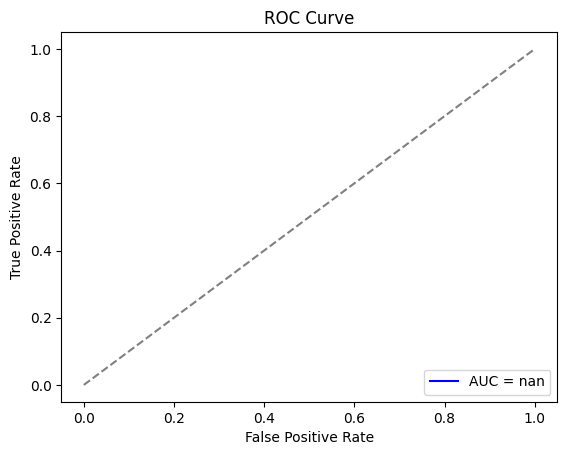

In [111]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt


# Avaliação no conjunto de teste
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype(int)

# Relatório de Classificação
print(classification_report(y_test, y_pred_class))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


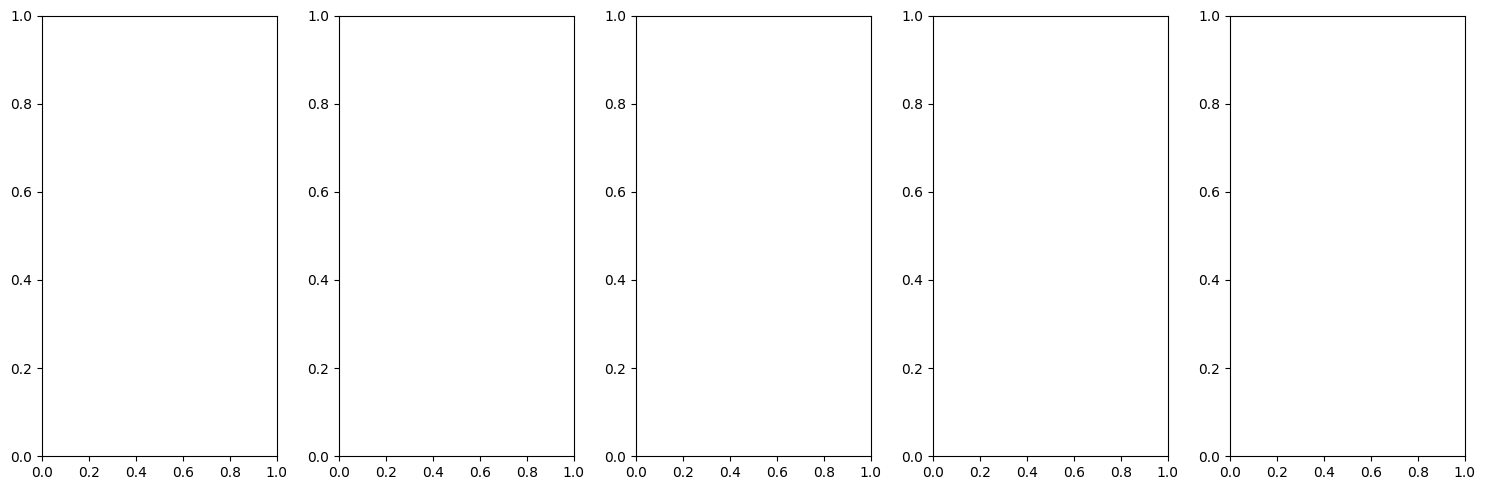

In [99]:
# Identificar imagens classificadas incorretamente
import matplotlib.pyplot as plt

incorrect_indices = np.where(y_pred_class != y_test)[0]

# Exibir algumas imagens mal classificadas
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, idx in enumerate(incorrect_indices[:5]):  # Mostrar as 5 primeiras
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f"Verdadeiro: {y_test[idx]}, Predito: {y_pred_class[idx]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [100]:
# Calculando F1-Score para verificar o equilíbrio
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
